### Importing Data and Libraries

In [71]:
import pandas as pd 
import numpy as np 

# To convert from Json to list
import ast

# To create deep learning models
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Embedding, Reshape, Dot, Concatenate, Dense, Dropout
from keras.models import Model
from keras.utils.vis_utils import plot_model

# To stack sparse matrices
from scipy.sparse import vstack

# For visulazation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [72]:
# Importing Dataset
df1=pd.read_csv('C:\\Machine Project\\dataset\\tmdb_6000_movie_dataset.csv')
df3=pd.read_csv('C:\\Machine Project\\dataset\\tmdb_6000_movie_ratings.csv')

### Data Cleaning, Preprocessing, and Analysing

In [73]:
print(df1.shape)
df1.head(2)

(5798, 21)


,Unnamed: 0,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [74]:
df1.columns

Index(['Unnamed: 0', 'budget', 'genres', 'homepage', 'tmdbId', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [75]:
# Feature Extraction
df1 = df1.drop(columns=['Unnamed: 0','budget','homepage','original_title','production_companies','production_countries','revenue','spoken_languages','status','tagline'])
print(df1.shape)
df1.head(2)

(5798, 11)


,genres,tmdbId,keywords,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Avatar,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [76]:
df1.index.name = 'index'
df1.head(2)

,genres,tmdbId,keywords,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count
index,,,,,,,,,,,
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Avatar,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [77]:
# Check for missing values
missing_values = df1.isnull().any()

# Check for duplicates
duplicates = df1.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
genres               False
tmdbId               False
keywords             False
original_language    False
overview              True
popularity           False
release_date          True
runtime               True
title                False
vote_average         False
vote_count           False
dtype: bool

Duplicates:
False


In [78]:
print(df1['release_date'].isnull().sum())
print(df1['runtime'].isnull().sum())

df1.dropna(subset=['release_date', 'runtime'], inplace=True)

1
2


In [79]:
#Count missing values in the 'overview' column
overview_missing_count = df1['overview'].isnull().sum()

# Print the count of missing values in the 'overview' column
print("Count of missing values in the 'overview' column:", overview_missing_count)

# Find rows with missing values in the 'overview' column
rows_with_missing_overview = df1[df1['overview'].isnull()]

# Display the rows with missing values in the 'overview' column
print("Rows with missing values in the 'overview' column:")
print(rows_with_missing_overview)

Count of missing values in the 'overview' column: 5
Rows with missing values in the 'overview' column:
                                                  genres   tmdbId  \
index                                                               
4431                 [{"id": 99, "name": "Documentary"}]   292539   
5225                                                  []  1164486   
5378                      [{'id': 27, 'name': 'Horror'}]   917281   
5755   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  1074080   
5795   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   998623   

                                                keywords original_language  \
index                                                                        
4431                                                  []                de   
5225                                                  []                pt   
5378                                                  []                es   
5755   [{'id': 9663, 'n

In [80]:
#fill missing values with a default description
df1['overview'] = df1['overview'].fillna('No overview available')

# Count missing values in the 'overview' column
overview_missing_count = df1['overview'].isnull().sum()

# Print the count of missing values in the 'overview' column
print("Count of missing values in the 'overview' column:", overview_missing_count)

Count of missing values in the 'overview' column: 0


In [81]:
# Check for missing values
missing_values = df1.isnull().any()

# Check for duplicates
duplicates = df1.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
genres               False
tmdbId               False
keywords             False
original_language    False
overview             False
popularity           False
release_date         False
runtime              False
title                False
vote_average         False
vote_count           False
dtype: bool

Duplicates:
False


In [82]:
# Method to convert features from Json to list
def transform(obj):
    T = []
    for t in ast.literal_eval(obj):
        t["name"]
        T.append(t["name"])
    return T

In [83]:
df1["genres"] = df1["genres"].apply(transform)

In [84]:
df1["keywords"] = df1["keywords"].apply(transform)

In [85]:
df1

,genres,tmdbId,keywords,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count
index,,,,,,,,,,,
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Avatar,7.200,11800
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.900,4500
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,148.0,Spectre,6.300,4466
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,165.0,The Dark Knight Rises,7.600,9106
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,132.0,John Carter,6.100,2124
...,...,...,...,...,...,...,...,...,...,...,...
5793,"[Comedy, Drama]",626332,"[biography, based on true story, janitor, mexi...",en,"The inspiring true story of Richard Montañez, ...",53.988000,2023-03-11,99.0,Flamin' Hot,8.190,410
5794,"[Action, Thriller]",1094319,[],en,Mercenaries seize control of a remote resort h...,47.740000,2023-04-21,93.0,The Best Man,6.167,93
5795,"[Action, Adventure]",998623,[],fr,No overview available,27.587000,2023-10-19,0.0,Drone Games,2.000,1


In [86]:
print(df3.shape)
df3.head(2)

(24537619, 4)


,tmdbId,userId,rating,timestamp
0,19995,10.0,3.5,2015-05-03 15:28:22
1,19995,14.0,3.5,2011-07-24 18:47:52


In [87]:
num_users = df3['userId'].nunique()
print("Number of unique users in the system:", num_users)

Number of unique users in the system: 328859


In [88]:
# Filter the DataFrame for each rating from 0 to 5 and count the number of users
for rating in range(6):
    num_users_for_rating = df3[df3['rating'] == rating]['userId'].nunique()
    print(f"Number of users who voted {rating}: {num_users_for_rating}")


Number of users who voted 0: 0
Number of users who voted 1: 131215
Number of users who voted 2: 191432
Number of users who voted 3: 267712
Number of users who voted 4: 295239
Number of users who voted 5: 275106


In [89]:
# Check for missing values
missing_values = df3.isnull().any()

# Check for duplicates
duplicates = df3.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
tmdbId       False
userId       False
rating       False
timestamp    False
dtype: bool

Duplicates:
False


In [90]:
# Feature Extraction
df3 = df3.drop(columns=['timestamp'])
print(df3.shape)

(24537619, 3)


### Preparing Data for Model Input
##### Creating a user-movie matrix and mappings.

In [91]:
# Create a user-movie matrix with empty values
df_p = df3.pivot_table(index='userId', columns='tmdbId', values='rating')
df_p.sample(6)

tmdbId,5,11,12,13,14,16,18,19,20,22,...,1045944,1059638,1064517,1070802,1074034,1076487,1094319,1098110,1102776,1107872
userId,,,,,,,,,,,,,,,,,,,,,
49123.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164006.0,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86416.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310680.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#create mappings
user_ids = df3["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

movie_ids = df3["tmdbId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df3["user"] = df3["userId"].map(user2user_encoded)
df3["movie"] = df3["tmdbId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)

df3 = df3.sample(frac=1, random_state=42)
x = df3[["user", "movie"]].values

# Normalize the targets between 0 and 1.
y = df3["rating"].apply(lambda x: (x - 0.5) / (4.5)).values

# Prepare training, validation and testing data 
# training on 80% of the data, validating on 10% and testing on 10% seperate samples.

train_indices = int(0.8 * df3.shape[0])  # 80% of the dataset for training
val_indices = int(0.1 * df3.shape[0])    # 10% of the dataset for validation
test_indices = int(0.1 * df3.shape[0])   # 10% of the dataset for testing

x_train, x_val, x_test, y_train, y_val, y_test = (
    x[:train_indices],
    x[train_indices:train_indices+val_indices],
    x[train_indices+val_indices:train_indices+val_indices+test_indices],
    y[:train_indices],
    y[train_indices:train_indices+val_indices],
    y[train_indices+val_indices:train_indices+val_indices+test_indices]
)


In [93]:
# Number of samples for training
num_train_samples = x_train.shape[0]

# Number of samples for validation
num_val_samples = x_val.shape[0]

print("Train on", num_train_samples, "samples, validate on", num_val_samples, "samples.")


Train on 19630095 samples, validate on 2453761 samples.


### Model Implementation
##### Implementing a model that will predict user ratings.

In [94]:
#embed both users and movies in to 50-dimensional vectors
embedding_size= 50

# Create model
# Set input layers
user_id_input = Input(shape=[1], name='user')
movie_id_input = Input(shape=[1], name='movie')

# Create embedding layers for users and movies
user_embedding = Embedding(output_dim=embedding_size, 
                           input_dim=num_users,
                           input_length=1, 
                           embeddings_initializer="he_normal",
                           embeddings_regularizer=keras.regularizers.l2(1e-6),
                           name='user_embedding')(user_id_input)
movie_embedding = Embedding(output_dim=embedding_size, 
                            input_dim=num_movies,
                            input_length=1, 
                            embeddings_initializer="he_normal",
                            embeddings_regularizer=keras.regularizers.l2(1e-6),
                            name='movie_embedding')(movie_id_input)

# Reshape the embedding layers
user_vector = Reshape([embedding_size])(user_embedding)
movie_vector = Reshape([embedding_size])(movie_embedding)

# Concatenate the reshaped embedding layers
concat = Concatenate()([user_vector, movie_vector])

# Combine with dense layers
dense1 = Dense(256)(concat)
dense = Dropout(0.2)(dense1)
y = Dense(1, activation="sigmoid")(dense) # The sigmoid activation forces the rating to between 0 and 1


# compile model
model = Model(inputs=[user_id_input, movie_id_input], outputs=y)
model.compile(loss='mse',  optimizer = 'adam')
 
# Fit the model
history = model.fit(x = [x_train[:,0],x_train[:,1]],
          y = y_train,
          batch_size=256, 
          epochs=4,
          validation_data = ([x_val[:,0], x_val[:,1]], y_val),
          )


Epoch 1/4
76681/76681 [==============================] - 547s 7ms/step - loss: 0.0414 - val_loss: 0.0404
Epoch 2/4
76681/76681 [==============================] - 562s 7ms/step - loss: 0.0405 - val_loss: 0.0405
Epoch 3/4
76681/76681 [==============================] - 552s 7ms/step - loss: 0.0405 - val_loss: 0.0405
Epoch 4/4
76681/76681 [==============================] - 550s 7ms/step - loss: 0.0406 - val_loss: 0.0404


In [107]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        16442950    ['user[0][0]']                   
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 50)        269600      ['movie[0][0]']                  
                                                                                            

In [108]:
#  Compute RMSE
y_pred = model.predict([x_test[:,0], x_test[:,1]])
y_true =  y_test

rmse = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))
print('\n\nTesting Result : {:.4f} RMSE'.format(rmse))

76681/76681 [==============================] - 76s 988us/step


Testing Result : 0.1969 RMSE


In [109]:
# Test model
p , a = (model.predict([x_test[:15,0], x_test[:15,1]]) , y_test[:15])
print("ratings are Normalized between 0 and 1 (0.5 - 5.0)")
for i in range(len(p)):
    print("predicted rating is : "+ str(np.round(p[i],2)) +"\tactual rating was : "+ str(round(a[i],2)) )

1/1 [==============================] - 0s 13ms/step
ratings are Normalized between 0 and 1 (0.5 - 5.0)
predicted rating is : [0.64]	actual rating was : 0.67
predicted rating is : [0.75]	actual rating was : 0.56
predicted rating is : [0.82]	actual rating was : 0.78
predicted rating is : [0.88]	actual rating was : 0.89
predicted rating is : [0.54]	actual rating was : 0.56
predicted rating is : [0.51]	actual rating was : 0.67
predicted rating is : [0.66]	actual rating was : 0.56
predicted rating is : [0.68]	actual rating was : 0.78
predicted rating is : [0.86]	actual rating was : 0.89
predicted rating is : [0.82]	actual rating was : 0.78
predicted rating is : [0.77]	actual rating was : 0.78
predicted rating is : [0.51]	actual rating was : 0.33
predicted rating is : [0.64]	actual rating was : 0.33
predicted rating is : [0.56]	actual rating was : 0.44
predicted rating is : [0.52]	actual rating was : 0.78


### Recommendations based on the NCF model
##### Creating a method that takes a userId and recommends movies the user didn't rate and might like based on the predicted ratings.

In [110]:
# display recommendations
def get_recomendations(user_id):
      movies_watched_by_user = df3[df3.userId == user_id]
      movies_not_watched = df1[
          ~df1["tmdbId"].isin(movies_watched_by_user.tmdbId.values)]["tmdbId"]
      movies_not_watched = list(
          set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
      )
      movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
      user_encoder = user2user_encoded.get(user_id)
      user_movie_array = np.hstack(
          ([[user_id]] * len(movies_not_watched), movies_not_watched)
      )

      ratings = model.predict([user_movie_array[:,0], user_movie_array[:,1]]).flatten()

      top_ratings_indices = ratings.argsort()[-10:][::-1]
      recommended_movie_ids = [
          movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
      ]

      print("Showing recommendations for user: {}".format(user_id))
      print("=" * 36)
      print("Movies with high ratings from user")
      print("-" * 34)
      top_movies_user = (
          movies_watched_by_user.sort_values(by="rating", ascending=False)
          .head(5)
          .tmdbId.values
      )
      movie_df_rows = df1[df1["tmdbId"].isin(top_movies_user)]
      for row in movie_df_rows.itertuples():
          print(row.title, ":", row.genres)

      print("-" * 30)
      print(" Top 10 movie recommendations")
      print("-" * 30)
      recommended_movies = df1[df1["tmdbId"].isin(recommended_movie_ids)]
      for row in recommended_movies.itertuples():
          print(row.title, ":", row.genres)

##### Displaying Recommendations for a particular User

In [111]:
get_recomendations(1)

167/167 [==============================] - 0s 1ms/step
Showing recommendations for user: 1
Movies with high ratings from user
----------------------------------
Gladiator : ['Action', 'Drama', 'Adventure']
Charlotte's Web : ['Comedy', 'Family', 'Fantasy']
The Notebook : ['Romance', 'Drama']
Die Hard : ['Action', 'Thriller']
Crash : ['Drama']
------------------------------
 Top 10 movie recommendations
------------------------------
GoodFellas : ['Drama', 'Crime']
The Shawshank Redemption : ['Drama', 'Crime']
The Godfather: Part II : ['Drama', 'Crime']
The Godfather : ['Drama', 'Crime']
The Hunt : ['Drama']
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb : ['Drama', 'Comedy', 'War']
Seven Samurai : ['Action', 'Drama']
12 Angry Men : ['Drama']
Come and See : ['Drama', 'War']
Parasite : ['Comedy', 'Thriller', 'Drama']


In [112]:
get_recomendations(300)

168/168 [==============================] - 0s 1ms/step
Showing recommendations for user: 300
Movies with high ratings from user
----------------------------------
The Dark Knight : ['Drama', 'Action', 'Crime', 'Thriller']
Star Trek : ['Science Fiction', 'Action', 'Adventure']
The Thin Red Line : ['Drama', 'History', 'War']
Schindler's List : ['Drama', 'History', 'War']
The Shawshank Redemption : ['Drama', 'Crime']
------------------------------
 Top 10 movie recommendations
------------------------------
Fight Club : ['Drama']
GoodFellas : ['Drama', 'Crime']
Spirited Away : ['Fantasy', 'Adventure', 'Animation', 'Family']
The Godfather : ['Drama', 'Crime']
The Hunt : ['Drama']
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb : ['Drama', 'Comedy', 'War']
Seven Samurai : ['Action', 'Drama']
12 Angry Men : ['Drama']
Come and See : ['Drama', 'War']
Parasite : ['Comedy', 'Thriller', 'Drama']


In [113]:
get_recomendations(150)

169/169 [==============================] - 0s 1ms/step
Showing recommendations for user: 150
Movies with high ratings from user
----------------------------------
Tomorrow Never Dies : ['Adventure', 'Action', 'Thriller']
Antz : ['Adventure', 'Animation', 'Comedy', 'Family']
A View to a Kill : ['Adventure', 'Action', 'Thriller']
The Empire Strikes Back : ['Adventure', 'Action', 'Science Fiction']
Central Station : ['Drama']
------------------------------
 Top 10 movie recommendations
------------------------------
GoodFellas : ['Drama', 'Crime']
The Shawshank Redemption : ['Drama', 'Crime']
The Godfather: Part II : ['Drama', 'Crime']
The Godfather : ['Drama', 'Crime']
The Hunt : ['Drama']
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb : ['Drama', 'Comedy', 'War']
Seven Samurai : ['Action', 'Drama']
12 Angry Men : ['Drama']
Come and See : ['Drama', 'War']
Parasite : ['Comedy', 'Thriller', 'Drama']


In [114]:
get_recomendations(96)

168/168 [==============================] - 0s 1ms/step
Showing recommendations for user: 96
Movies with high ratings from user
----------------------------------
The Lord of the Rings: The Fellowship of the Ring : ['Adventure', 'Fantasy', 'Action']
The Lord of the Rings: The Return of the King : ['Adventure', 'Fantasy', 'Action']
The Lord of the Rings: The Two Towers : ['Adventure', 'Fantasy', 'Action']
The Matrix : ['Action', 'Science Fiction']
Premium Rush : ['Crime', 'Action', 'Thriller']
------------------------------
 Top 10 movie recommendations
------------------------------
Fight Club : ['Drama']
GoodFellas : ['Drama', 'Crime']
Spirited Away : ['Fantasy', 'Adventure', 'Animation', 'Family']
The Godfather: Part II : ['Drama', 'Crime']
The Hunt : ['Drama']
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb : ['Drama', 'Comedy', 'War']
Seven Samurai : ['Action', 'Drama']
The Seventh Seal : ['Fantasy', 'Drama']
Come and See : ['Drama', 'War']
Parasite : ['Comedy',

### Visualization 
##### Visualizing the data.

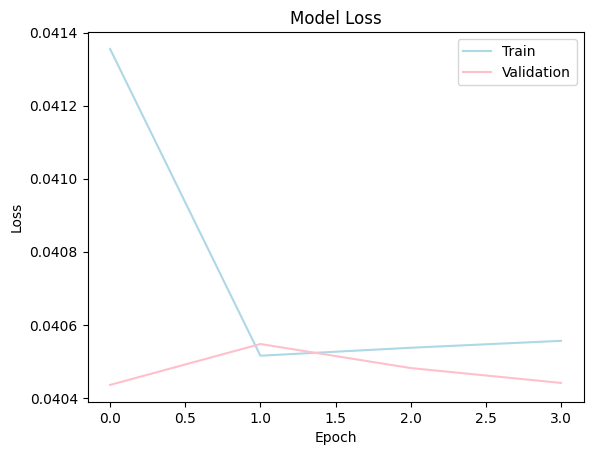

In [115]:
# Visulizing model loss over epoch using both training and testing

plt.plot(history.history["loss"], color='lightblue')  
plt.plot(history.history["val_loss"], color='pink')  
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

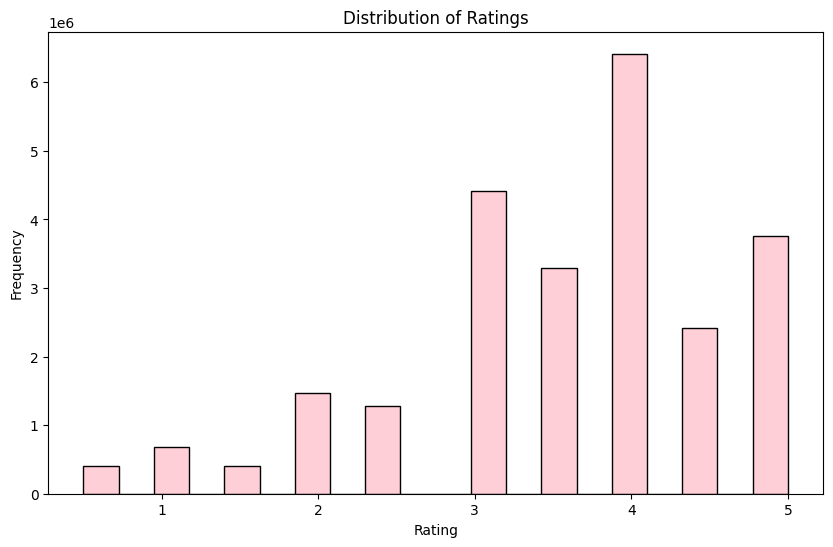

In [116]:
# Plot histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df3['rating'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

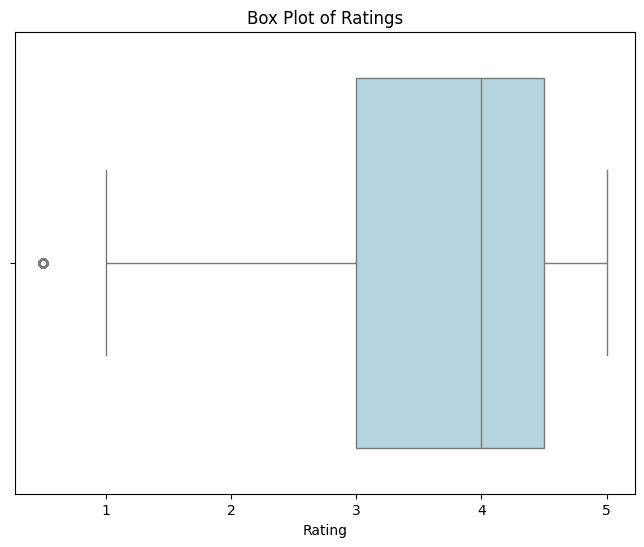

In [117]:
# Plot box plot of ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', data=df3, color='lightblue')
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

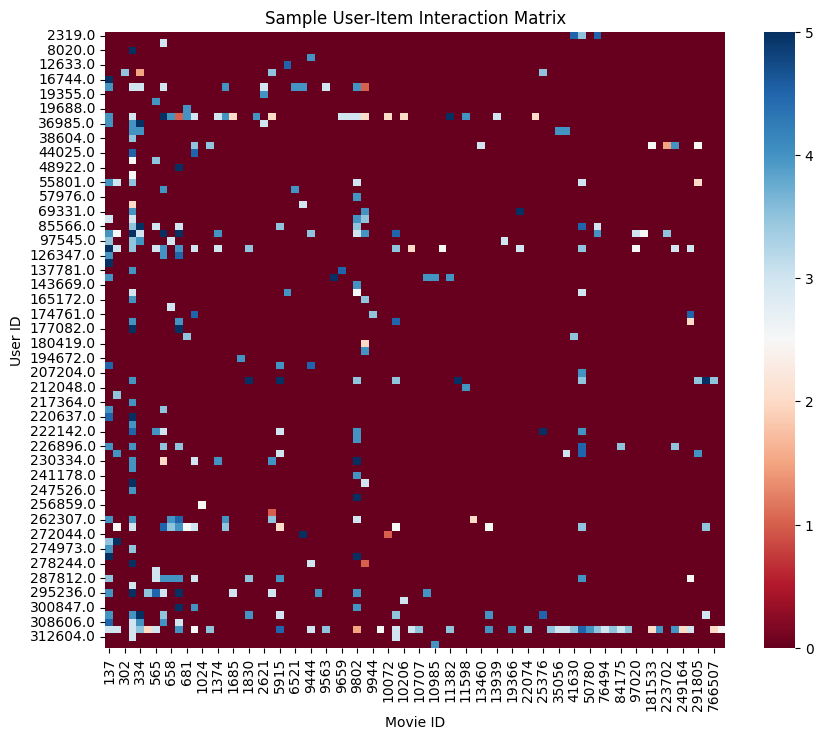

In [118]:
# Sample size for users and items
sample_size_users = 150
sample_size_items = 150

# Sample users and items
sample_users = np.random.choice(df3['userId'].unique(), size=sample_size_users, replace=False)
sample_items = np.random.choice(df3['tmdbId'].unique(), size=sample_size_items, replace=False)

# Filter the dataframe based on the sample users and items
sample_df = df3[df3['userId'].isin(sample_users) & df3['tmdbId'].isin(sample_items)]

# Create the interaction matrix
user_item_interaction = sample_df.pivot_table(index='userId', columns='tmdbId', values='rating', fill_value=0)

# Plot the interaction matrix
plt.figure(figsize=(10, 8))
sns.heatmap(user_item_interaction, cmap='RdBu', cbar=True)
plt.title('Sample User-Item Interaction Matrix')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()
